In [1]:
import polars as pl
import math
import numpy as np

In [5]:
print(f'{math.pi = }')

math.pi = 3.141592653589793


In [9]:
#Perform some element-wise mathematical operations
(pl.DataFrame({
    'x': [-2, 0, 0.5, 1, math.e, 1000]
}, strict=False)
.with_columns(
    sqrt = pl.col('x').sqrt(),
    log2 = pl.col('x').log(2),
    log10 = pl.col('x').log10(),
    crqt = pl.col('x').cbrt(),
    abs = pl.col('x').abs(),
    exp = pl.col('x').exp(),
    sign = pl.col('x').sign()
 )
)

x,sqrt,log2,log10,crqt,abs,exp,sign
f64,f64,f64,f64,f64,f64,f64,i64
-2.0,NaN,NaN,NaN,-1.259921,2.0,0.135335,-1
0.0,0.0,-inf,-inf,0.0,0.0,1.0,0
0.5,0.707107,-1.0,-0.30103,0.793701,0.5,1.648721,1
1.0,1.0,0.0,0.0,1.0,1.0,2.718282,1
2.718282,1.648721,1.442695,0.434294,1.395612,2.718282,15.154262,1
1000.0,31.622777,9.965784,3.0,10.0,1000.0,inf,1


In [2]:
#Let implement backword_fill, forword_fill, interpolate and shift in Polars
(
    pl.DataFrame({'x': [-1, 0, 1, None, None, 3, 4, math.nan, 5, 6]}, strict=False)
    .with_columns(
        backward_fill = pl.col('x').backward_fill(),
        forward_fill = pl.col('x').forward_fill(),
        interpolate_linear = pl.col('x').interpolate(method='linear'),
        interpolate_nearest = pl.col('x').interpolate(method='nearest'),
        shift_down = pl.col('x').shift(1),
        shift_up = pl.col('x').shift(-1)
    )
    #.collect()
)

x,backward_fill,forward_fill,interpolate_linear,interpolate_nearest,shift_down,shift_up
f64,f64,f64,f64,f64,f64,f64
-1.0,-1.0,-1.0,-1.0,-1.0,null,0.0
0.0,0.0,0.0,0.0,0.0,-1.0,1.0
1.0,1.0,1.0,1.0,1.0,0.0,null
null,3.0,1.0,1.666667,1.0,1.0,null
null,3.0,1.0,2.333333,3.0,null,3.0
3.0,3.0,3.0,3.0,3.0,null,4.0
4.0,4.0,4.0,4.0,4.0,3.0,NaN
NaN,NaN,NaN,NaN,NaN,4.0,5.0
5.0,5.0,5.0,5.0,5.0,NaN,6.0


In [3]:
#Read in data

base_path = '/Users/user/Code/python-polars-the-definitive-guide/data/'
file_path = base_path + 'stock/nvda/2023.csv'
stock = (
pl.read_csv(file_path, try_parse_dates=True)
.select("date", "close")
.with_columns(
    ewm = pl.col('close').ewm_mean(com=7),
    rolling_mean = pl.col('close').rolling_mean(window_size=7),
    rolling_minimum = pl.col('close').rolling_min(window_size=7)
)
#.head(10)
)

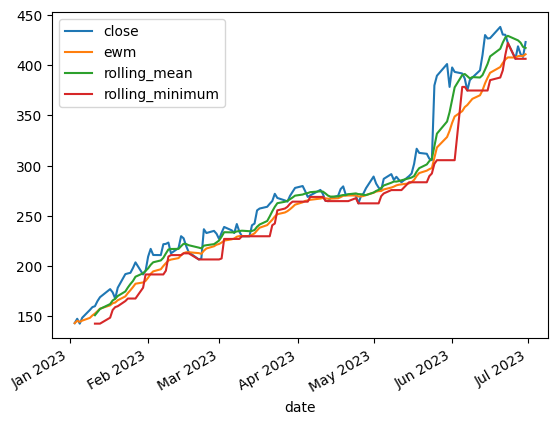

In [14]:
#Visualise the table
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt


stock_df = stock.to_pandas()
ax = stock_df.plot.line(
    x = 'date',
    y = ['close', 'ewm', 'rolling_mean', 'rolling_minimum']
)
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.show()

In [22]:
import numpy as np
#instantiate random generator
rng = np.random.default_rng(1729)

samples = pl.Series(rng.integers(low=0, high=1000, size=1_729))
samples[403] = None 
data = (pl.DataFrame({'x': samples})
 .with_row_index()
)
#give me index 400 and extend it by 6
data.slice(400, 6)


index,x
u32,i64
400,260
401,446
402,562
403,null
404,579
405,436


In [23]:
(data
 .select(
     approximate_n_unique = pl.col('x').approx_n_unique(),
     count = pl.col('x').count(),
     len = pl.col('x').len(),
     n_unique = pl.col('x').n_unique(),
     null_count = pl.col('x').null_count()
 )
 )

approximate_n_unique,count,len,n_unique,null_count
u32,u32,u32,u32,u32
834,1728,1729,832,1
